****Input all the neccessay packages****

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

sns.set()
print(os.listdir("../input"))

['churn-modelling']


In [2]:
churn_data = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv',
                         index_col='RowNumber')

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We used the describe() function to get the statistics associated with each column. This will be helpful for the purpose of scaling.

In [6]:
churn_data.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

We will start with preprocessing each features.
1)Cerdit Score

In [7]:
churn_data.CreditScore.isna().any()

False

Lets remove the Customer ID and Surname, as they won't be of any help for a good analysis.

In [8]:
churn_data.drop(labels=['CustomerId','Surname'],
                axis=1,
                inplace=True)

In [9]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
churn_data.Geography.value_counts(dropna=False)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
churn_data.Gender.value_counts(dropna=False)

Male      5457
Female    4543
Name: Gender, dtype: int64

Now we require to do one hot encoding of the above two selected labels. We can see that there are 3 classess in Geography and Two labels in Gender. Lets convert the string type to int.

In [12]:
churn_data_cleaned = pd.get_dummies(churn_data, 
                                    prefix=['Geo','Gen'], 
                                    prefix_sep='_',
                                    dummy_na=False, 
                                    columns=['Geography','Gender'],
                                    sparse=False,
                                    drop_first=False,
                                    dtype=int) 

In [13]:
churn_data_cleaned

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0


Now that we have cleaned the data, and converted all the categorical data to numeric, we are ready for further analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6ceb945f8>,
      dtype=object)

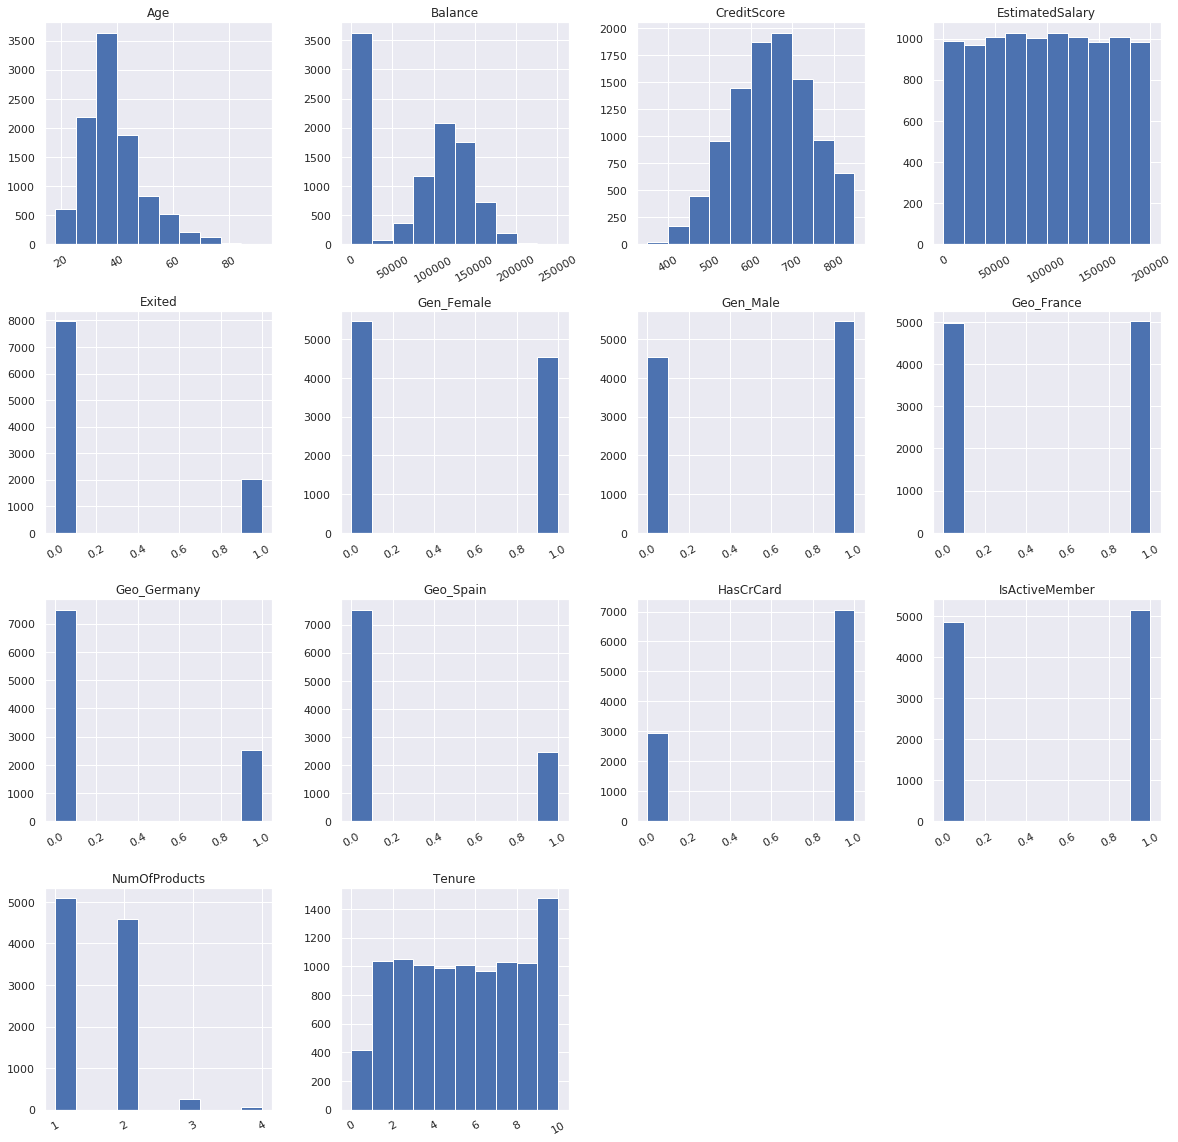

In [14]:
churn_data_cleaned.hist(bins=10,
                        figsize=(20,20),
                        xrot=30)

In [15]:
labels=churn_data_cleaned.columns
print(labels)
scaler=preprocessing.StandardScaler()
scaled_churn_data_cleaned=scaler.fit_transform(churn_data_cleaned)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geo_France',
       'Geo_Germany', 'Geo_Spain', 'Gen_Female', 'Gen_Male'],
      dtype='object')


In [16]:
scaled_churn_data_cleaned=pd.DataFrame(scaled_churn_data_cleaned)
scaled_churn_data_cleaned.columns=labels

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb70846f860>,
      dtype=object)

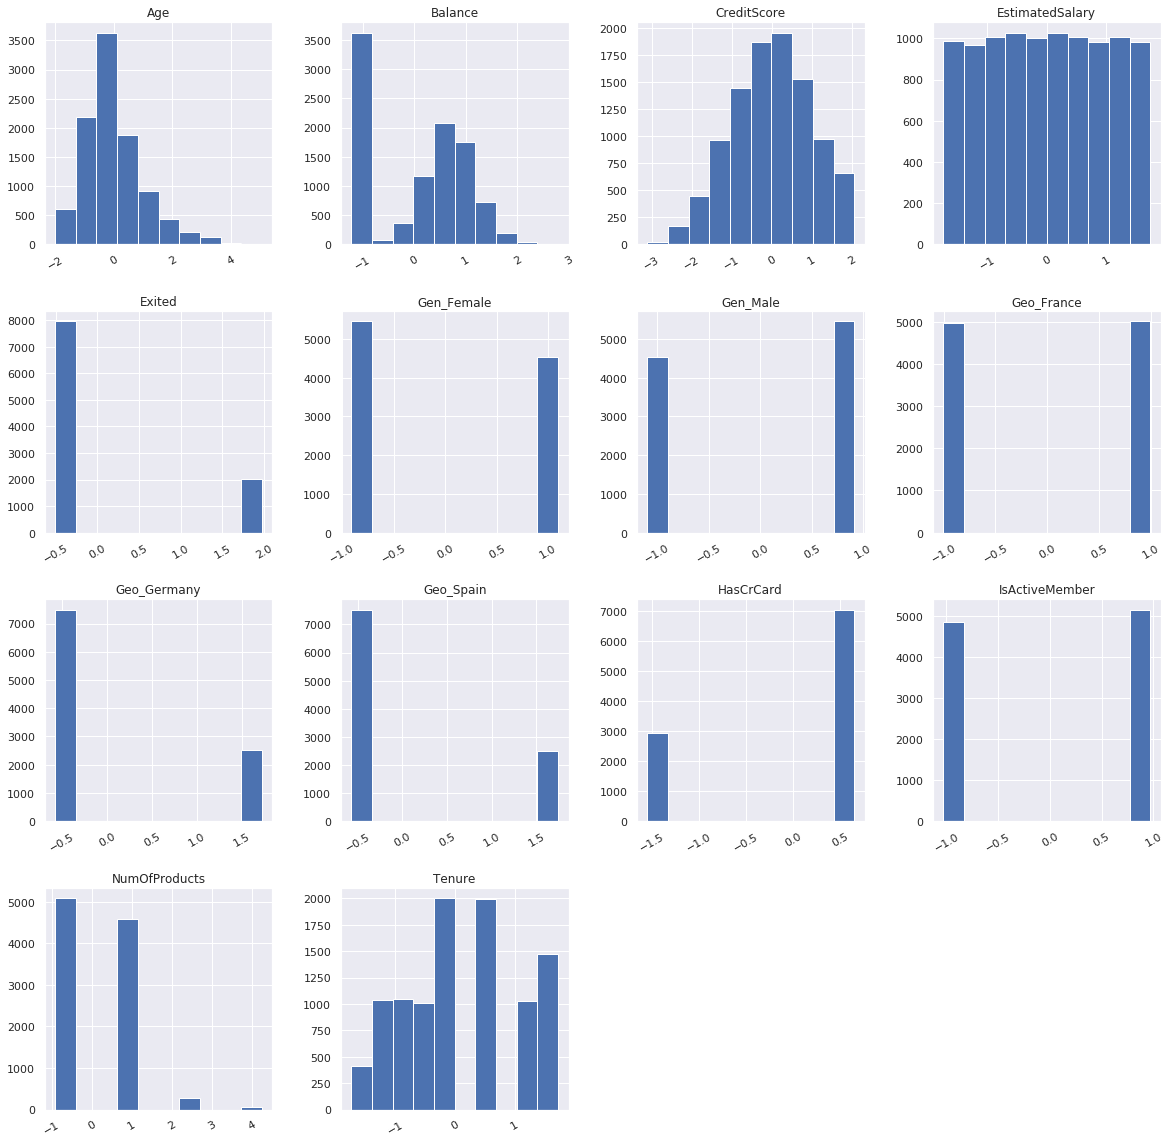

In [17]:
scaled_churn_data_cleaned.hist(bins=10,
                               figsize=(20,20),
                               xrot=30)

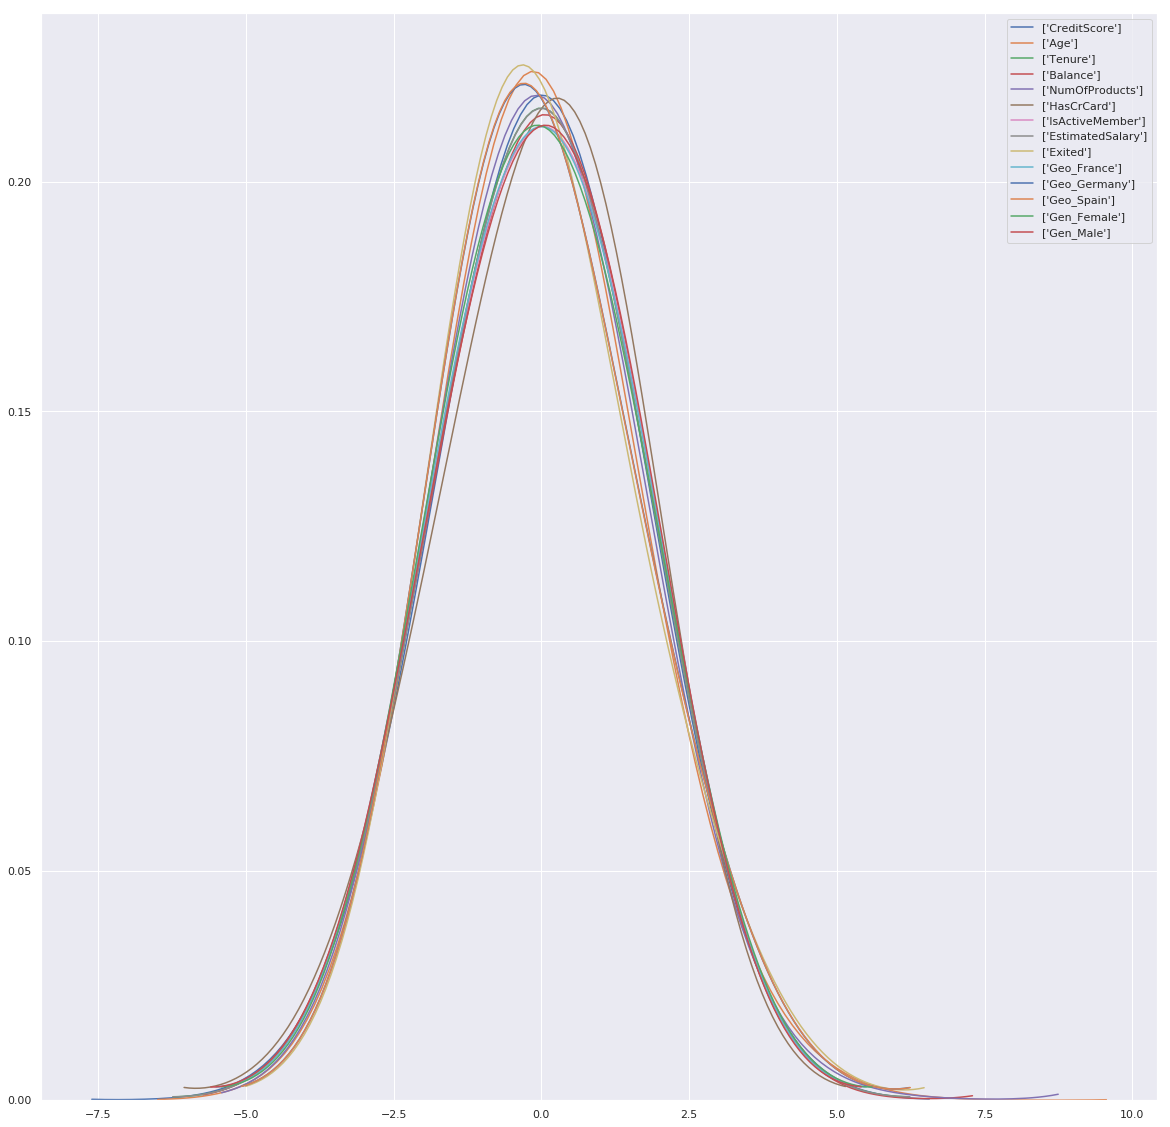

In [18]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
for i in scaled_churn_data_cleaned.columns:
    sns.kdeplot(scaled_churn_data_cleaned[i],
                 label=[i],
                 bw=1.5,
                 ax=ax)

We can see now that all the data have been scaled down in the limit of [-4,4].

Now, that we have done the necessary scaling, we can safely move forward and try to identify the corelation among all the set of features.

First we will try to calculate the correlation matrix with Exited(Output feature) column in consideration, and lets see how the dependency matrix looks like.

In [19]:
corr=scaled_churn_data_cleaned.corr()

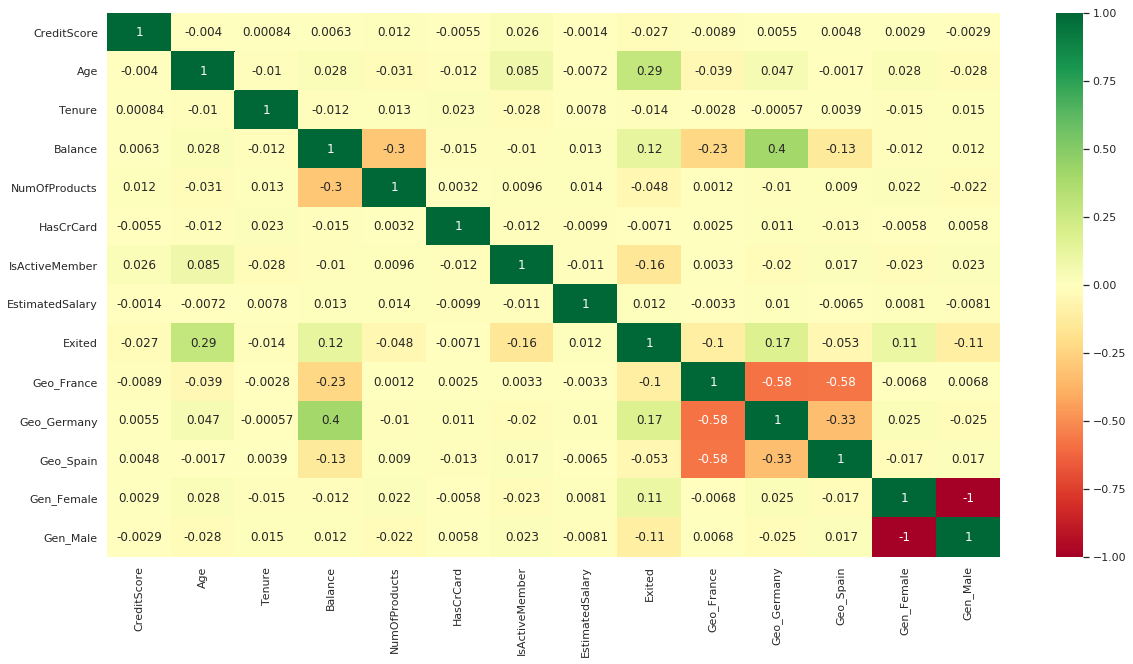

In [20]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr,
            annot=True,
            cmap='RdYlGn',
            ax=ax)

Now, lets try to visualize the correlation data in box plt using the seaborn package.

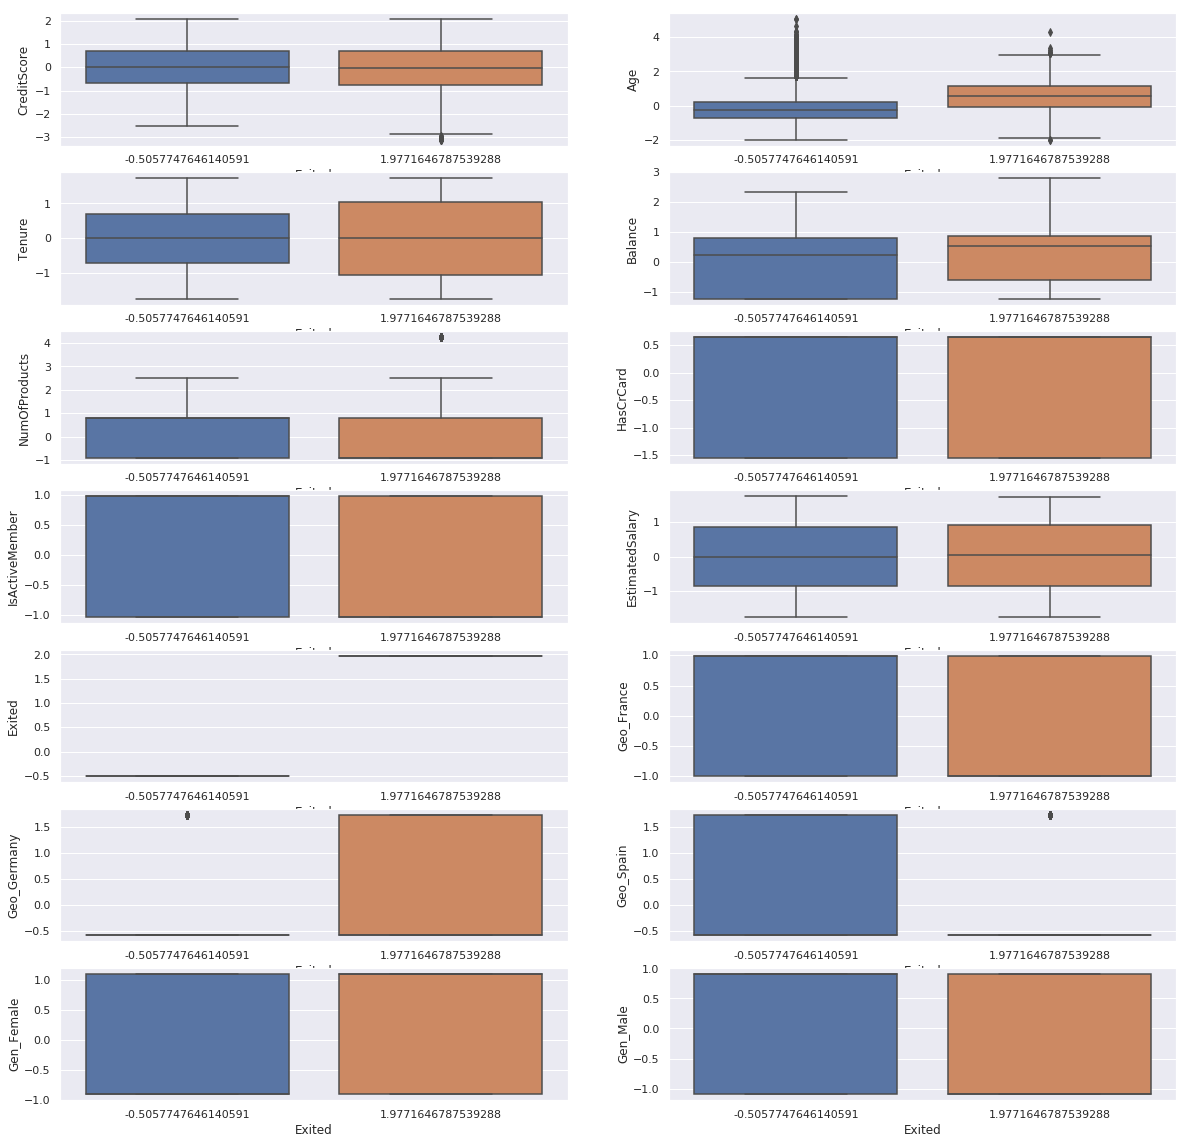

In [21]:
nr=7
nc=2
fig,ax=plt.subplots(nrows=nr,ncols=nc,figsize=(20,20))
i=0
for j in range(nr):
    for k in range(nc):
        axes=ax[j,k]
        
        sns.boxplot(x=scaled_churn_data_cleaned['Exited'],
                    y=scaled_churn_data_cleaned.iloc[:,i],
                    ax=axes)
        i+=1

Now we are ready for building the elements for modelling the data set. 
Before proceeding lets remove the output feature, Exited from the dataset.

In [22]:
scaled_churn_data_cleaned=scaled_churn_data_cleaned.drop('Exited',
                                                         axis=1)

In [23]:
scaled_churn_data_cleaned.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geo_France', 'Geo_Germany',
       'Geo_Spain', 'Gen_Female', 'Gen_Male'],
      dtype='object')

Now we can apply PCA to the given input dataset.

In [24]:
from sklearn.decomposition import PCA

n_comp = 2
pca=PCA(n_components=n_comp)
principal_components=pca.fit_transform(scaled_churn_data_cleaned)
len(principal_components)

10000

In [25]:
pc_df=pd.DataFrame(principal_components,
                  columns=['principal_components_%s'%(i+1) for i in range(n_comp)],
                  index=range(1,len(principal_components)+1))
print(pc_df)

       principal_components_1  principal_components_2
1                    1.387928               -1.560629
2                    1.503348                0.497692
3                    1.546108               -0.946819
4                    1.492500               -1.859357
5                    1.511359                0.844971
...                       ...                     ...
9996                -1.366106               -1.584795
9997                -1.488683               -0.902250
9998                 1.336455               -1.604751
9999                -0.983799                1.580061
10000                1.436110               -0.617327

[10000 rows x 2 columns]


In [26]:
input_components=pc_df
output_components=churn_data.Exited
print(input_components.shape,output_components.shape)
final_df=pd.concat([input_components,output_components],axis=1)

(10000, 2) (10000,)


Visualizing in 2D using the Principal components 1 & principal components 2 as y and x axis.

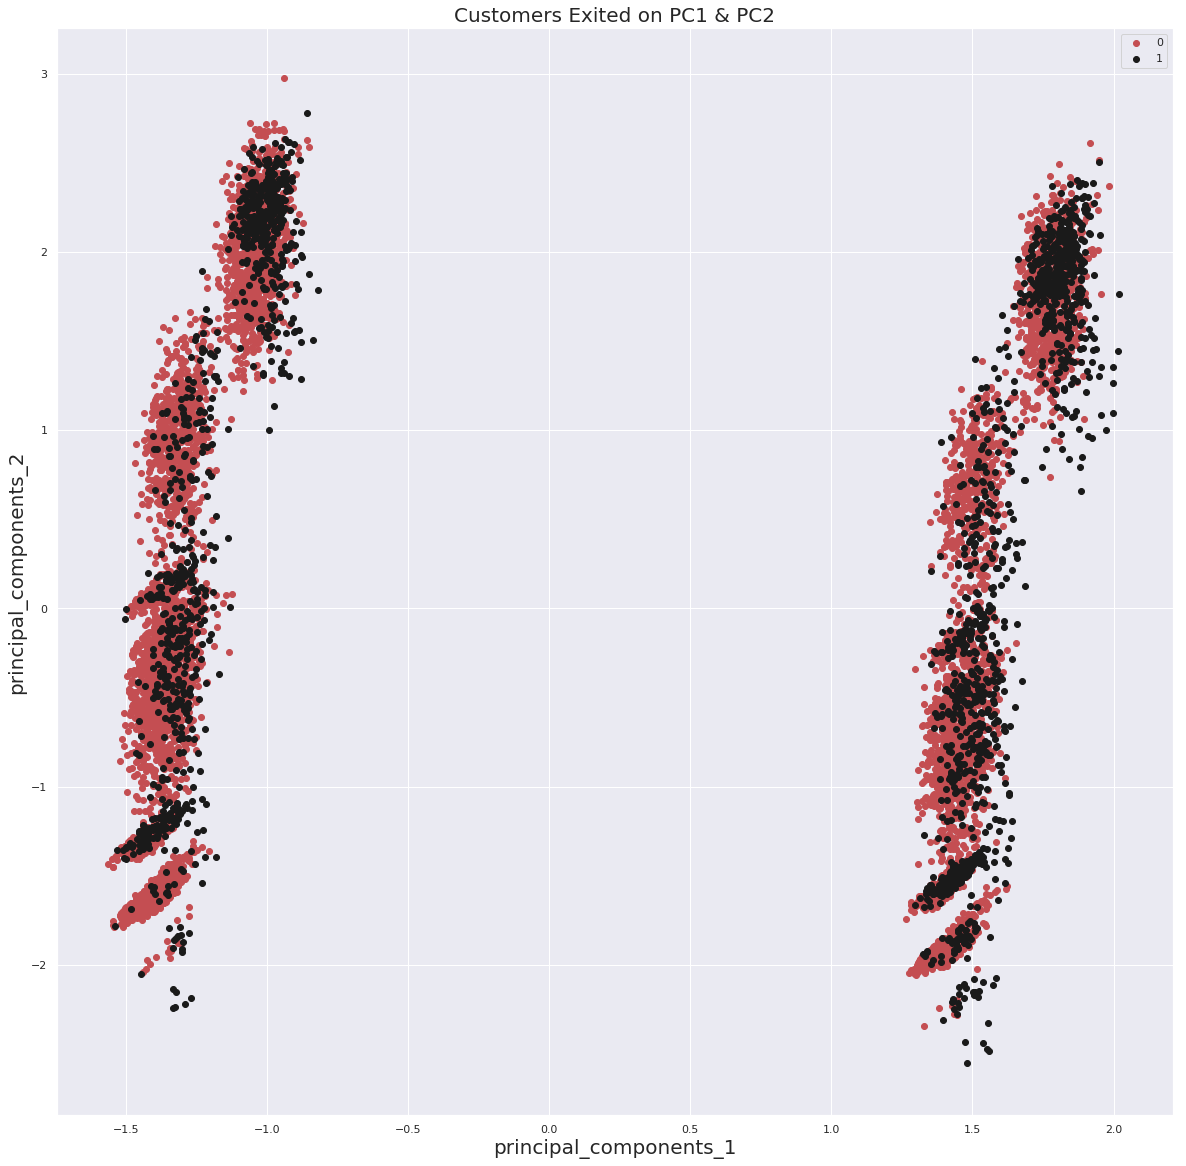

In [27]:
fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.set_xlabel('principal_components_1',fontsize=20)
ax.set_ylabel('principal_components_2',fontsize=20)
ax.set_title('Customers Exited on PC1 & PC2',fontsize=20)

Targets=[0,1]
colors=['r','k']

for target,color in zip(Targets,colors):
    index_no_target=final_df['Exited']==target
    ax.scatter(final_df.loc[index_no_target,'principal_components_1'],
               final_df.loc[index_no_target,'principal_components_2'],
              c=color)
    ax.legend(Targets)
    ax.grid()

In [28]:
pca.explained_variance_ratio_

array([0.15443344, 0.14341087])

We observed that only 15.44% and 14.3% variances is attributed to eachc of the first two principal components.
Since we have 13 dimension in feature space, we will try to retain most of the variance using 10 principal components.

In [29]:
n_comp=10
pca_10=PCA(n_components=n_comp)
pca10_comp=pca_10.fit_transform(scaled_churn_data_cleaned)
df_PCA_10=pd.DataFrame(pca10_comp,
                       columns=['Principal_component_%s'%(i+1) for i in range(n_comp)],
                      index=range(1,len(pca10_comp)+1))
print(df_PCA_10)

       Principal_component_1  Principal_component_2  Principal_component_3  \
1                   1.387928              -1.560629              -0.523848   
2                   1.503348               0.497692               1.766645   
3                   1.546108              -0.946819              -0.668985   
4                   1.492500              -1.859357              -0.188735   
5                   1.511359               0.844971               1.570735   
...                      ...                    ...                    ...   
9996               -1.366106              -1.584795              -0.260406   
9997               -1.488683              -0.902250              -0.845113   
9998                1.336455              -1.604751              -0.419149   
9999               -0.983799               1.580061              -0.294160   
10000               1.436110              -0.617327              -1.190535   

       Principal_component_4  Principal_component_5  Principal_

In [30]:
sum(pca_10.explained_variance_ratio_)

0.9582302343976028

In [31]:
#Test Train split of the datdset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_PCA_10,
                                               output_components,
                                               test_size=0.4,
                                               random_state=0)

We can see here that 95.8% of the variance is retained in these 10 Principal Components. 

Now we can proceed for creating the model development using the ten principal components created.
First we will start with Logistic Regression.

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:, 1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)

print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(model.__class__.__name__+" score is  %.2f" % model.score(x_test,y_test))

Train/Test split results:
LogisticRegression accuracy is 0.806
LogisticRegression log_loss is 0.431
LogisticRegression auc is 0.770
LogisticRegression score is  0.81


The score is pretty well, lets now try with some other algorithm and see if we can get any better results.

Now lets start with Decision tree model, and see the results.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

score=model.score(x_test,y_test)
print(score)

0.772


In [34]:
cross_val_score(model,x_train,y_train,cv=10)

array([0.8       , 0.76166667, 0.78166667, 0.78      , 0.77166667,
       0.785     , 0.74833333, 0.76166667, 0.78333333, 0.78333333])

In [35]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,
                            bootstrap=True,
                            max_features='sqrt')
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
print(model.score(x_test,y_test))

0.848


We see a significant improvement in the model accuracy on going from Decision Tree to Random Forest classifier.